In [17]:
from robust import *

In [18]:
%load_ext autoreload
%autoreload 2

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import logging
from tqdm.notebook import tqdm
import powerlaw

from graph_summary_utils import *
from cabam_utils import *

logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

#logging.basicConfig(level=logging.DEBUG)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
native_probs = [2/3, 1/6, 1/6]  # using suitable multinomial parameters for the 3-class case as discussed on page 5
n = 500  # grow graph to size of 5000 nodes
m = 15  # each node added connects to m other nodes
c = 3  # there are c classes

# tanh setting for degree-varying assortativity
tau = 15
tanh_c_probs = {k: {1: np.tanh(k/tau), 0: 1 - np.tanh(k/tau)} for k in range(100000)}

G, node_degrees, node_labels, intra_class, inter_class, ratio_tracker, alpha_tracker = cabam_graph_generation(n=n, 
                                                                                                              m=m, 
                                                                                                              c=c,
                                                                                                              native_probs=native_probs,
                                                                                                              c_probs=tanh_c_probs)
G = ig.Graph.from_networkx(G)
print(G.density())
print(G.average_path_length())
print(G.transitivity_avglocal_undirected())
print(G.assortativity_degree())

In [80]:
native_probs = [2/3, 1/6, 1/6]  # using suitable multinomial parameters for the 3-class case as discussed on page 5
n = 500  # grow graph to size of 5000 nodes
m = 15  # each node added connects to m other nodes
c = 3  # there are c classes

# tanh setting for degree-varying assortativity
tau = 15
tanh_c_probs = {k: {1: np.tanh(k/tau), 0: 1 - np.tanh(k/tau)} for k in range(100000)}

G_1, node_degrees, node_labels, intra_class, inter_class, ratio_tracker, alpha_tracker = cabam_graph_generation(n=n, 
                                                                                                              m=m, 
                                                                                                              c=c,
                                                                                                              native_probs=native_probs,
                                                                                                              c_probs=tanh_c_probs)

  0%|          | 0/500 [00:00<?, ?it/s]

In [81]:
Gb_1 = ig.Graph.from_networkx(G_1)
Gr_1 = random(Gb_1.copy())

print(Gb_1.density())
print(Gb_1.average_path_length())
print(Gb_1.transitivity_avglocal_undirected())
print(Gb_1.assortativity_degree())

0.058316633266533066
2.2092264529058117
0.16081292012354942
0.01590839904300486


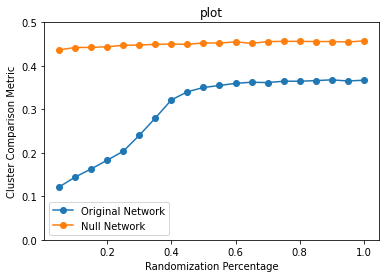

In [86]:
output_1 = robin_robust(graph=Gb_1, graph_random=Gr_1, method="louvain")
plot_1 = plot_robin(Gb_1, output_1["Mean"], output_1["MeanRandom"], legend=("Original Network", "Null Network"))

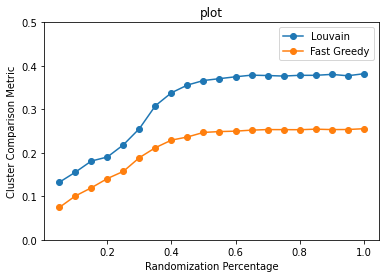

In [87]:
compare_output_1 = robin_compare(graph=Gb_1, method1="louvain", method2="fastgreedy")
plot_robin(Gb_1, compare_output_1["Mean1"], compare_output_1["Mean2"], legend=("Louvain", "Fast Greedy"))

In [84]:
native_probs = [2/3, 1/6, 1/6]  # using suitable multinomial parameters for the 3-class case as discussed on page 5
n = 500  # grow graph to size of 5000 nodes
m = 15  # each node added connects to m other nodes
c = 3  # there are c classes

# tanh setting for degree-varying assortativity
tau = 1
tanh_c_probs = {k: {1: np.tanh(k/tau), 0: 1 - np.tanh(k/tau)} for k in range(100000)}

G_2, node_degrees, node_labels, intra_class, inter_class, ratio_tracker, alpha_tracker = cabam_graph_generation(n=n, 
                                                                                                              m=m, 
                                                                                                              c=c,
                                                                                                              native_probs=native_probs,
                                                                                                              c_probs=tanh_c_probs)

  0%|          | 0/500 [00:00<?, ?it/s]

In [88]:
Gb_2 = ig.Graph.from_networkx(G_2)
Gr_2 = random(Gb_2.copy())

print(Gb_2.density())
print(Gb_2.average_path_length())
print(Gb_2.transitivity_avglocal_undirected())
print(Gb_2.assortativity_degree())

0.058316633266533066
2.4360801603206412
0.2712593590096738
-0.010171483799146714


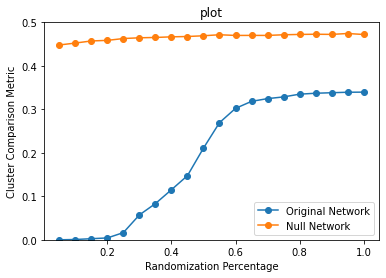

In [89]:
output_2 = robin_robust(graph=Gb_2, graph_random=Gr_2, method="louvain")
plot_2 = plot_robin(Gb_2, output_2["Mean"], output_2["MeanRandom"], legend=("Original Network", "Null Network"))

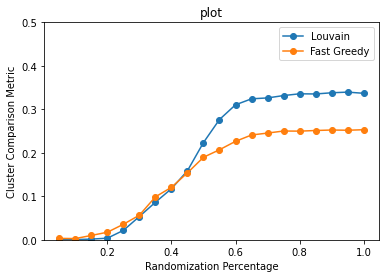

In [90]:
compare_output_2 = robin_compare(graph=Gb_2, method1="louvain", method2="fastgreedy")
plot_robin(Gb_2, compare_output_2["Mean1"], compare_output_2["Mean2"], legend=("Louvain", "Fast Greedy"))